# IMPORT IMP Libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# READ DATASET

In [17]:
df = pd.read_csv('orignal 1.csv')

In [19]:
df.shape

(17024, 4)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17024 entries, 0 to 17023
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  17024 non-null  object
 1   Country Code  17024 non-null  object
 2   years         17024 non-null  int64 
 3   Population    17024 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 532.1+ KB


In [293]:
df_clean = df.dropna()

# Head and Tail

In [296]:
df.head()

,Country Name,Country Code,years,Population
0,Aruba,ABW,1960,54922
1,Aruba,ABW,1961,55578
2,Aruba,ABW,1962,56320
3,Aruba,ABW,1963,57002
4,Aruba,ABW,1964,57619


In [298]:
df.tail()

,Country Name,Country Code,years,Population
17019,Zimbabwe,ZWE,2019,15271368
17020,Zimbabwe,ZWE,2020,15526888
17021,Zimbabwe,ZWE,2021,15797210
17022,Zimbabwe,ZWE,2022,16069056
17023,Zimbabwe,ZWE,2023,16340822


# Preprocessing Data

# Finding missing values

In [332]:
df.isnull().sum()

Country Name    0
Country Code    0
years           0
Population      0
dtype: int64

# Finding Duplicates

In [335]:
df.duplicated().sum()

0

# Finding garbage values

In [338]:
for i in df.select_dtypes(include = "object").columns:
    print(df[i].value_counts())
    print("***"*20)

Country Name
Aruba                   64
Oman                    64
Malawi                  64
Malaysia                64
North America           64
                        ..
Guyana                  64
High income             64
Hong Kong SAR, China    64
Honduras                64
Zimbabwe                64
Name: count, Length: 266, dtype: int64
************************************************************
Country Code
ABW    64
OMN    64
MWI    64
MYS    64
NAC    64
       ..
GUY    64
HIC    64
HKG    64
HND    64
ZWE    64
Name: count, Length: 266, dtype: int64
************************************************************


# Exploratory Data Analysis [EDA]

In [21]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
years,17024.0,1.991500e+03,1.847350e+01,1960.0,1975.75,1991.5,2007.25,2.023000e+03
Population,17024.0,2.154097e+08,7.097223e+08,0.0,929956.75,6630636.0,46226073.25,8.061876e+09


In [23]:
df.describe(include="object")

,Country Name,Country Code
count,17024,17024
unique,266,266
top,Aruba,ABW
freq,64,64


# Spliting Dataset

In [25]:
from sklearn.model_selection import train_test_split

In [73]:
X = df[['Country Name', 'years']] 
y = df['Population']

In [75]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13619, 2)
(3405, 2)
(13619,)
(3405,)


# CREATING VISUALIZATION

In [346]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

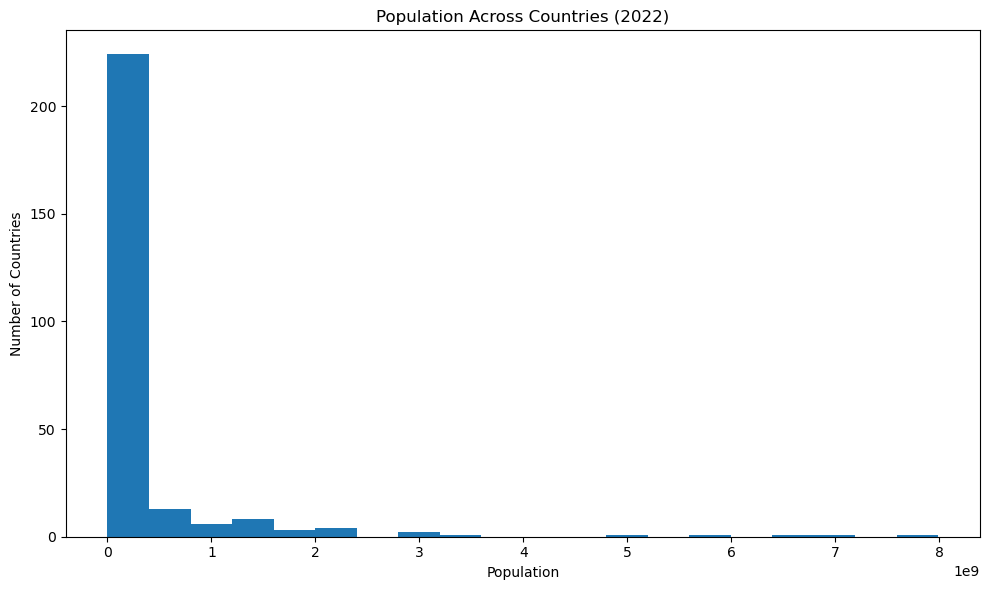

In [348]:
# histogram 
plt.figure(figsize=(10, 6))
plt.hist(df[df['years'] == 2022]['Population'], bins=20)
plt.title('Population Across Countries (2022)')
plt.xlabel('Population')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

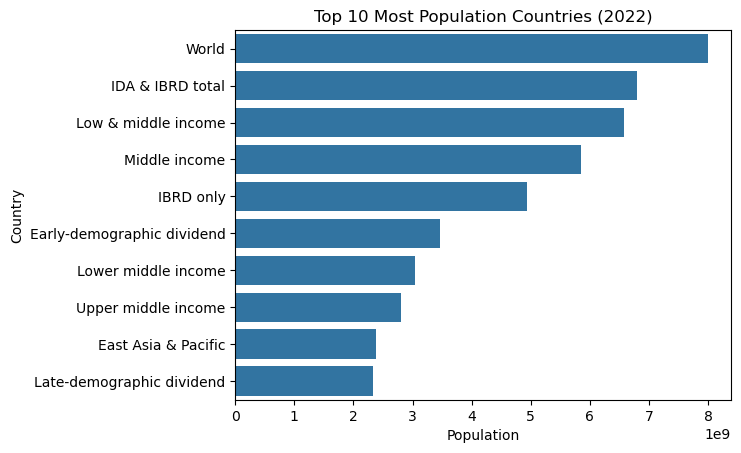

In [350]:
# Bar Chart
top_countries = df[df['years'] == 2022].sort_values('Population', ascending=False).head(10)
sns.barplot(x='Population', y='Country Name', data=top_countries)
plt.title("Top 10 Most Population Countries (2022)")
plt.xlabel("Population")
plt.ylabel("Country")
plt.show()

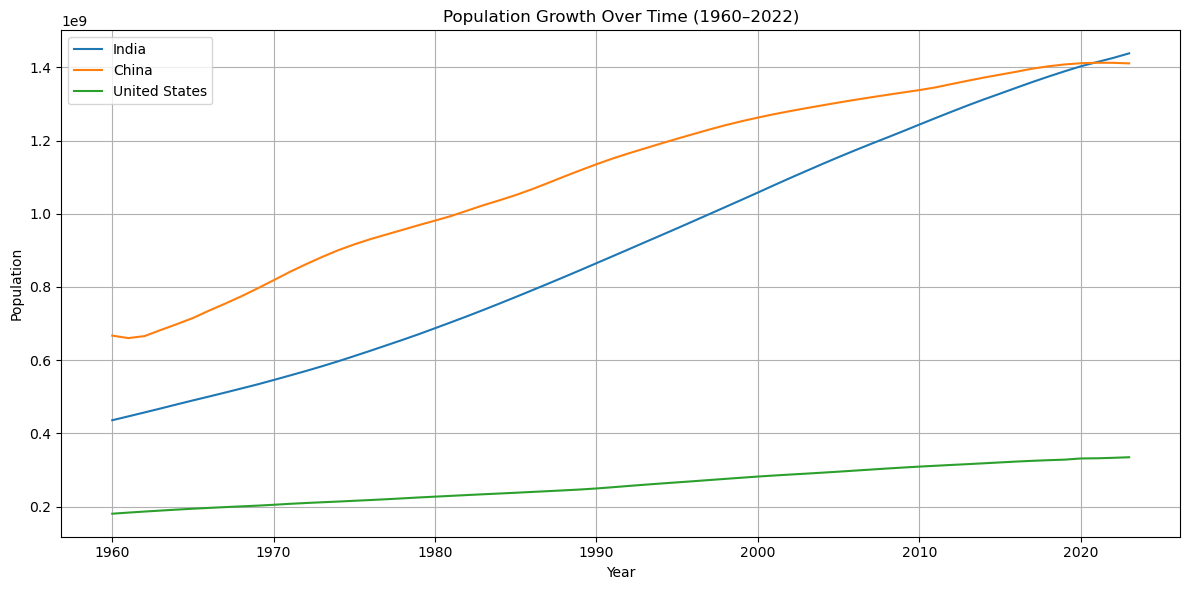

In [352]:
# Line Chart (for specific countries )
selected_countries = ['India', 'China', 'United States']
plt.figure(figsize=(12, 6))

for country in selected_countries:
    data = df[df['Country Name'] == country]
    plt.plot(data['years'], data['Population'], label=country)

plt.title('Population Growth Over Time (1960–2022)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


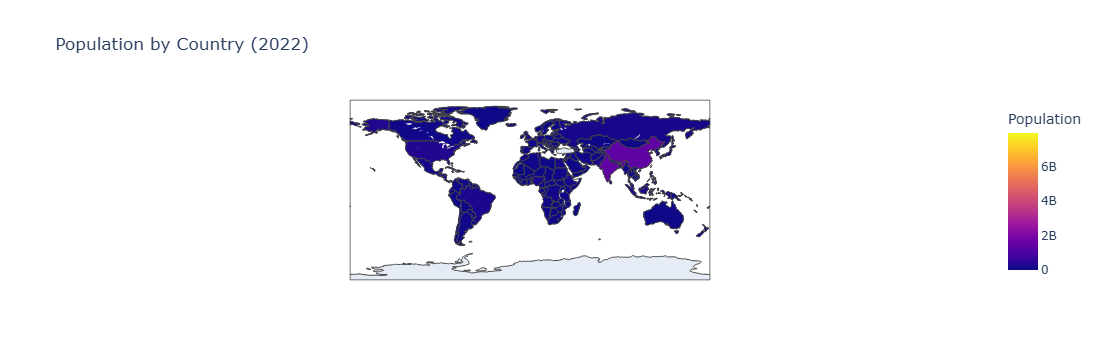

In [354]:
# Choropleth Map
df_map = df[df['years'] == 2022]

fig = px.choropleth(df_map,
                    locations='Country Name',
                    locationmode='country names',
                    color='Population',
                    hover_name='Country Name',
                    color_continuous_scale='Plasma',
                    title='Population by Country (2022)')
fig.show()


# Spliting date into training and testing set

NameError: name 'X' is not defined